In [64]:
import sys # Standard Python Module
# Path location for pyNab :
sys.path.append("/Users/akannan/Downloads/Lab/NabWork/NabPy/src")
# Path location for deltarice :
sys.path.append("/Users/akannan/Downloads/Lab/NabWork/deltarice-master")
import pandas as pd # Standard Data Analysis and Manipulation Package
import numpy as np # Stanard Numerical Processing Package
import nabPy as Nab # In - house read - out and Signal Processing Package
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [66]:
dataLoc = '/Users/akannan/Downloads/'

In [68]:
# Read in the data
run = 5730
dataFile = Nab.File(f'{dataLoc}Run{run}_0.h5')
coinc = dataFile.coincWaves()
pulsr = dataFile.pulsrWaves()
noise = dataFile.noiseWaves()
single = dataFile.singleWaves()
print(single)
filter_settings =[1250 ,50 ,1250]

Index(['result', 'bc', 'timestamp', 'req', 'event type', 'hit type', 'blank',
       'eventid', 'checksum', 'board', 'channel', 'unix timestamp', 'pixel',
       'energy', 't0'],
      dtype='object')

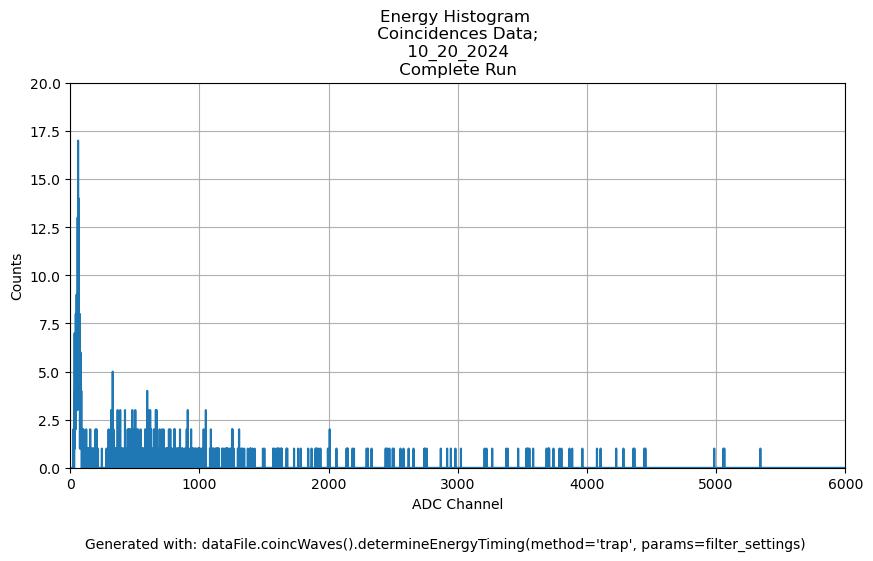

In [56]:
Ctimings = coinc.determineEnergyTiming(method='trap', params=filter_settings)  # get the result
print(Ctimings)
fig, ax = plt.subplots(figsize=(10, 5))
fig.patch.set_facecolor('xkcd:white')
fig.text(0.5, -0.05, "Generated with: dataFile.coincWaves().determineEnergyTiming(method='trap', params=filter_settings)", 
         ha='center')
ax.set_xlabel('ADC Channel')
ax.set_ylabel('Counts')
ax.grid(True)
ax.set_title("Energy Histogram \n Coincidences Data; \n 10_20_2024 \n Complete Run ")
Ctimings.hist('energy', bins = Nab.np.arange(0,6000))
plt.xlim(0,6000)
plt.ylim(0,20)
Ctimings.data().columns

Index(['result', 'bc', 'timestamp', 'req', 'event type', 'hit type', 'blank',
       'eventid', 'checksum', 'board', 'channel', 'unix timestamp', 'pixel',
       'energy', 't0'],
      dtype='object')

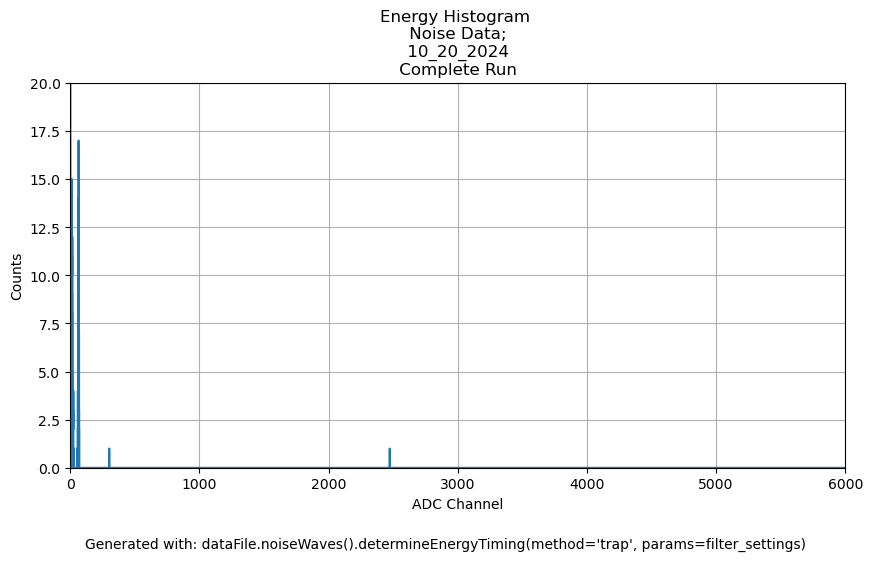

In [62]:
Btimings = noise.determineEnergyTiming(method='trap', params=filter_settings)  # get the result
print(Btimings)
fig, ax = plt.subplots(figsize=(10, 5))
fig.patch.set_facecolor('xkcd:white')
fig.text(0.5, -0.05, "Generated with: dataFile.noiseWaves().determineEnergyTiming(method='trap', params=filter_settings)", 
         ha='center')
ax.set_xlabel('ADC Channel')
ax.set_ylabel('Counts')
ax.grid(True)
ax.set_title("Energy Histogram \n Noise Data; \n 10_20_2024 \n Complete Run ")
Btimings.hist('energy', bins = Nab.np.arange(0,6000))
plt.xlim(0,6000)
plt.ylim(0,20)
Btimings.data().columns

In [54]:
A = Nab.DataRun(f'{dataLoc}',run)
print(A)
B = A.openWaveformFiles

AttributeError: 'DataRun' object has no attribute 'openWaveformFiles'

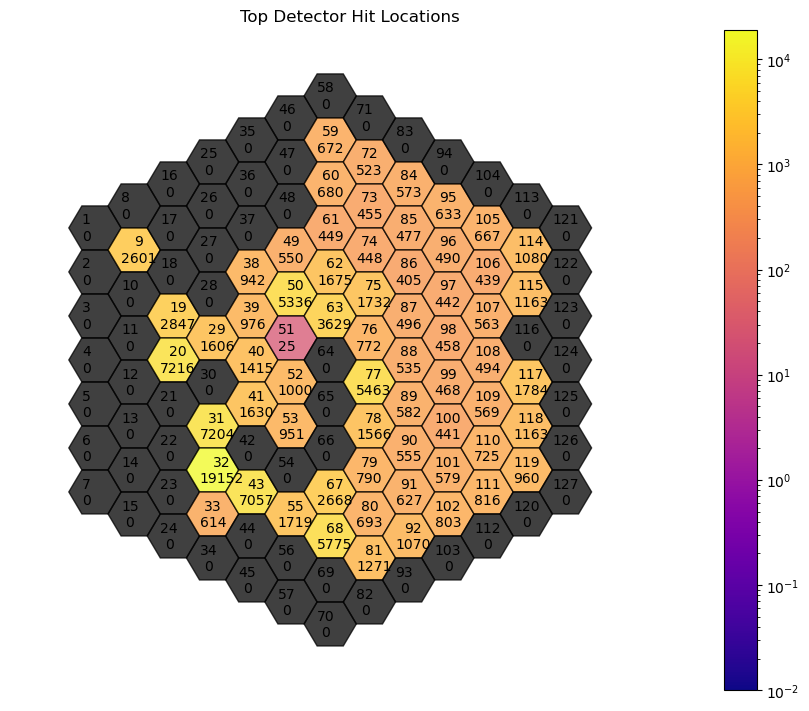

Signature:
Nab.bf.applyTrapFilter(
    waves,
    rise,
    top,
    tau,
    percentage=0.8,
    mean=0,
    shift=0,
    pretrigger=800,
    batchsize=1000,
    useGPU=False,
    hdf5ChunkSize=None,
    rechunk=False,
    useFFTW=True,
)
Docstring:
This function applies the trapezoidal filter to a batch of waveforms and extracts energy and timing information with it. This version of the filter is defined via convolutions instead of the standard recursive method to improve performance in Python.
For a description of the trapezoidal filter defined here, check this resource.
Nuclear Instruments and Methods in Physics Research A353 (1994) 261-264
https://deepblue.lib.umich.edu/bitstream/handle/2027.42/31113/0000009.pdf?sequence=1

Parameters
----------
waves: np.ndarray
        a 2d numpy array with waveforms in it
rise: int
        the risetime parameter for the trapezoidal filter
top: int
        the flat top length of the trapezoidal filter
tau: int,float
        the decay rate parame

In [72]:


trap: Nab.bf.applyTrapFilter?

kwargs = {
    'alpha': 0.75,
    'cmap': 'plasma',
    'logNorm': True
}

kwargsPlot = {
    'labels':np.asarray(np.arange(1,128),dtype=str),
    'labelValues': True
}

fig = dataFile.plotHitLocations(
    plot = True,
    sourceFile='single',
    kwargsFig = kwargs,
    kwargsPlot=kwargsPlot
)
fig